## Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

## Reading data
will start by loading and displaying some values from the full Boston housing dataset with thirteen features of census tracts that are believed to be predictive of the median home price in the tract (see **housing.names.txt** for a full description of these features). By looking at the values, you will note that the values of some of the features are  about 1000 times the values of others.

In [16]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

print 'Reading data ...'
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)
# df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading data ...


## Divide data into training, validation and test sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(df.values, bdata.target)

X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val)

print 'Training set size ', X_train.shape
print 'Validation set size ', X_val.shape
print 'Test set size ', X_test.shape

Training set size  (379L, 13L)
Validation set size  (95L, 13L)
Test set size  (32L, 13L)


## Regularized Linear Regression cost function and gradient (vectorized)
Regularized linear regression has the following cost function:
$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right) + \frac{\lambda}{2m}\left( \sum_{j=1}^{n} {\theta_j}^2 \right) $$
where $\lambda$ is a regularization parameter which controls the degree of regularization
(thus, help preventing overfitting). The regularization term puts
a penalty on the overall cost $J(\theta)$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. You should now complete the code for the method loss in the class Reg_LinearRegression_SquaredLoss in the file reg_linear_regressor_multi.py to calculate $J(\theta)$. Vectorize your code and avoid writing for loops.

Correspondingly, the partial derivative of the regularized linear regression  cost function
with respect to  $\theta_j$ is defined as:
\begin{eqnarray*}
\frac{\partial J(\theta)}{\partial \theta_0} & = & \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}){x_j}^{(i)} \\
\frac{\partial J(\theta)}{\partial \theta_j} & = & \left(\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} ){x_j}^{(i)}\right) + \frac{\lambda}{m}{\theta_j} \; \; \; \mbox{ for }j \geq 1\\
\end{eqnarray*}

This training function uses scipy's fmin_bfgs to optimize the cost function.

Here we have set the regularization parameter $\lambda$ to zero. 

Optimization terminated successfully.
         Current function value: 11.565640
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Theta at lambda = 0 is  [ 22.55145393  -1.22403857   1.36682856   0.4844388    0.84184113
  -2.38011674   2.28919261   0.30965956  -3.09722144   2.78847292
  -1.80247642  -1.98161817   0.71941735  -4.07378627]
Error on the test set with lambda = 0 is 5.24490105114
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Curre

Optimization terminated successfully.
         Current function value: 4.055135
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 4.005871
         Iterations: 32
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 4.034377
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 4.010817
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.938695
         Iterations: 31
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.880484
         Iterations: 31
         Function evaluations: 32
  

Optimization terminated successfully.
         Current function value: 6.569993
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 6.507905
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 6.488893
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 6.429478
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 6.374251
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 7.501358
         Iterations: 27
         Function evaluations: 28
  

Optimization terminated successfully.
         Current function value: 8.759093
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 8.846357
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 8.801314
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 8.747331
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.704421
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 8.683984
         Iterations: 27
         Function evaluations: 28
  

         Current function value: 7.674173
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 7.725608
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 7.706878
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 8.250454
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 8.270918
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 9.945318
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimi

Optimization terminated successfully.
         Current function value: 9.762099
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 9.790624
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 9.776371
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 9.740674
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 9.728715
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 9.693534
         Iterations: 25
         Function evaluations: 26
  

         Current function value: 11.836411
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.801158
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 11.791844
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 11.783774
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.752799
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.734018
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


Optimization terminated successfully.
         Current function value: 11.565640
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


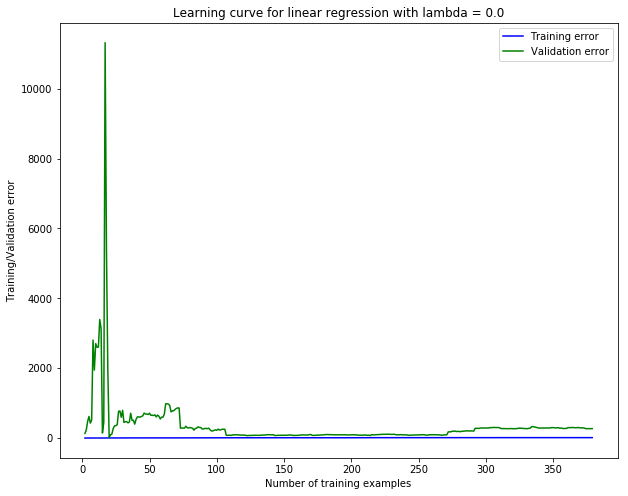

In [27]:
reg = 0.0

# Scale training features
XX_train, mu, sigma = utils.feature_normalize(X_train)

# Add a column to training set
XX = np.c_[np.ones(XX_train.shape[0]), XX_train]
XX_val = (X_val - mu)/sigma

XX_val = np.c_[np.ones(XX_val.shape[0]), XX_val]
yy = y_train

#  Train linear regression with lambda = 0
reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX,yy,reg,num_iters=1000)
print 'Theta at lambda = 0 is ', theta_opt0

# Compute error on the test set
XX_test = (X_test - mu)/sigma
XX_test = np.c_[np.ones(XX_test.shape[0]), XX_test]
print 'Error on the test set with lambda = 0 is', reglinear_reg1.loss(theta_opt0, XX_test, y_test, 0.0)

# Plot learning curve
error_train, error_val = utils.learning_curve(XX,yy,XX_val,y_val,reg)
plot_utils.plot_learning_curve(error_train, error_val,reg)
plt.show()